In [97]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"jathiswarbhaskar","key":"a91a8acc31112850a802163bddd9b9cc"}'}

In [98]:
!pip install -q kaggle

In [99]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [100]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete             World Health 2020 🌏 | For Geospatial Analysis         1MB  2021-01-06 16:22:50           1175  
gpreda/pfizer-vaccine-tweets                                   Pfizer Vaccine Tweets                               416KB  2021-01-07 12:08:56            857  
google/android-smartphones-high-accuracy-datasets              Android smartphones high accuracy GNSS datasets       1GB  2020-12-23 01:51:11            163  
ashkhagan/women-representation-in-city-property-sanfrancisco   Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            185  
arashnic/covid19-case-surveillance-public-use-

In [101]:
!kaggle datasets download -d blastchar/telco-customer-churn

telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [102]:
!ls

'kaggle (1).json'   kaggle.json   telco-customer-churn.zip
'kaggle (2).json'   sample_data   WA_Fn-UseC_-Telco-Customer-Churn.csv


In [105]:
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
replace WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [107]:
!ls

'kaggle (1).json'   kaggle.json   telco-customer-churn.zip
'kaggle (2).json'   sample_data   WA_Fn-UseC_-Telco-Customer-Churn.csv


Importing necessary libraries.


In [108]:
import pandas as pd
import numpy as np

In [109]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',sep=",")
data.shape

(7043, 21)

Describing The Data


In [110]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Finding Out The Columns Of The Given Dataset


In [111]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Check if there is any Null Values in any of the rows in the given columns


In [112]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Check for Nan Values in the dataset columns


In [113]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Display the first few rows of the dataset


In [114]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
Find out the correlation between the columns/features of the given data


In [115]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


Finding out and Visualising the Total Male and Female Candidates


Male      3555
Female    3488
Name: gender, dtype: int64

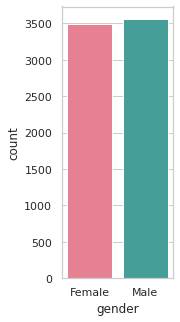

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
mydata=data.copy()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(2,5))
sns.countplot(x="gender",data=mydata,palette='husl')
data.gender.value_counts()

Finding out the number of senior citizens who are churners


In [117]:
import pandas as pd 
churn = mydata.query('SeniorCitizen=="1" and Churn == "Yes"')
churn.customerID.count()

476

Number of Male and Female Senior Citizens Who are Churners


Female    240
Male      236
Name: gender, dtype: int64

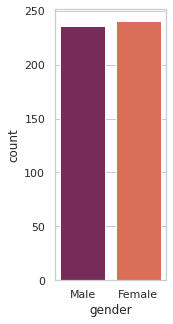

In [118]:
plt.figure(figsize=(2,5))
sns.set_theme(style="whitegrid")
sns.countplot(x="gender",data=churn,palette='rocket')
churn.gender.value_counts()

Representing The Different Services Consumed By The Customers


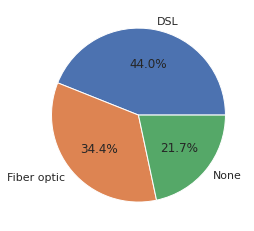

In [119]:
service=['DSL','Fiber optic','None']
plt.pie(mydata.InternetService.value_counts(),labels=service, autopct='%1.1f%%')
plt.show()

Finding Out The Datatypes of Monthly and Total Charges of the data.

In [120]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Monthly and Total Charges can be replaced by a single column 'Months'
The datatypes are made float for easy operation to derive number of months.

In [121]:
mydata = data

mydata[pd.to_numeric(mydata['MonthlyCharges'], errors='coerce').isna()][['MonthlyCharges','Churn']]
mydata['MonthlyCharges'] = pd.to_numeric(mydata['MonthlyCharges'], errors='coerce')


In [122]:
mydata[pd.to_numeric(mydata['TotalCharges'], errors='coerce').isna()][['TotalCharges','Churn']]
mydata['TotalCharges'] = pd.to_numeric(mydata['TotalCharges'], errors='coerce')

Checking the datatypes after conversion.


In [123]:
mydata.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Creating a new column Months by dividing the total charges with the monthly charges


In [124]:
mydata['Months'] = mydata.TotalCharges/mydata.MonthlyCharges

Rouding off The Months to an Integer Value.

In [125]:
import numpy as np
mydata['Months'] = np.round(mydata['Months'])
mydata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Months
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,33.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,44.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.0


Finding out the Mean to creating a factor for encoding.

In [126]:
mydata.Months.mean()

32.418657565415245

Making a 0-1 encoding based on months above and below the mean number of months.

In [127]:
mydata1 = mydata.copy()
mydata1['Months'] = mydata1['Months'].apply(lambda x: 1 if x >= 32.0 else 0)

Fidning out the Month Counts of above and below the mean value.

In [128]:
mydata1.Months.value_counts()

0    3717
1    3326
Name: Months, dtype: int64

Dropping off the unwanted columns from the data.

In [129]:
mydata1 = mydata1.drop(['MonthlyCharges','TotalCharges','customerID','MultipleLines'],axis=1)

In [130]:
mydata1['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [131]:
mydata1.tenure.mean()

32.37114865824223

Encoding values of the Contract Column based on the number of months.

In [132]:
mydata1['tenure'] = mydata1['tenure'].apply(lambda x: 1 if x >= 32.0 else 0)
mydata1.tenure.value_counts()

0    3706
1    3337
Name: tenure, dtype: int64

In [133]:
mydata1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Months
0,Female,0,Yes,No,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
1,Male,0,No,No,1,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,1
2,Male,0,No,No,0,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0
3,Male,0,No,No,1,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,1
4,Female,0,No,No,0,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0


Using Label Encoder,encode the rest of the columns of the given dataset.

In [134]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
mydata1['gender'] = encoder.fit_transform(mydata1['gender'])
mydata1['Partner'] = encoder.fit_transform(mydata1['Partner'])
mydata1['Dependents'] = encoder.fit_transform(mydata1['Dependents'])
mydata1['PhoneService'] = encoder.fit_transform(mydata1['PhoneService'])
mydata1['InternetService'] = encoder.fit_transform(mydata1['InternetService'])
mydata1['OnlineSecurity'] = encoder.fit_transform(mydata1['OnlineSecurity'])
mydata1['OnlineBackup'] = encoder.fit_transform(mydata1['OnlineBackup'])
mydata1['DeviceProtection'] = encoder.fit_transform(mydata1['DeviceProtection'])
mydata1['TechSupport'] = encoder.fit_transform(mydata1['TechSupport'])
mydata1['StreamingTV'] = encoder.fit_transform(mydata1['StreamingTV'])
mydata1['StreamingMovies'] = encoder.fit_transform(mydata1['StreamingMovies'])
mydata1['Contract'] = encoder.fit_transform(mydata1['Contract'])
mydata1['PaperlessBilling'] = encoder.fit_transform(mydata1['PaperlessBilling'])
mydata1['PaymentMethod'] = encoder.fit_transform(mydata1['PaymentMethod'])
mydata1['Churn'] = encoder.fit_transform(mydata1['Churn'])

In [135]:
mydata1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Months
0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,1,2,0,0
1,1,0,0,0,1,1,0,2,0,2,0,0,0,1,0,3,0,1
2,1,0,0,0,0,1,0,2,2,0,0,0,0,0,1,3,1,0
3,1,0,0,0,1,0,0,2,0,2,2,0,0,1,0,0,0,1
4,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,2,1,0


In [137]:
mydata1.shape

(7043, 18)

Making a train-test split for creating a predictive model.

In [138]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(mydata1, test_size=0.30, random_state=30)

In [145]:
train_data.Churn.value_counts()

0    3675
1    1255
Name: Churn, dtype: int64

In [146]:
test_data.Churn.value_counts()

0    1499
1     614
Name: Churn, dtype: int64

Correlation Values of all the features of the training data.

In [150]:
train_data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Months
gender,1.000000,-0.003122,0.011385,0.012749,-0.005101,0.001539,0.021789,-0.013978,-0.025444,-0.000667,-0.014977,-0.010852,-0.020536,0.000914,-0.006518,0.013034,-0.000348,-0.001833
SeniorCitizen,-0.003122,1.000000,0.019603,-0.209700,0.016206,-0.008108,-0.055711,-0.136735,-0.025428,-0.020965,-0.142004,0.019350,0.045147,-0.139210,0.150948,-0.038627,0.157670,0.010268
Partner,0.011385,0.019603,1.000000,0.452707,0.309360,0.015448,0.004712,0.143269,0.149173,0.165917,0.129060,0.123040,0.109587,0.294337,-0.019837,-0.139857,-0.137295,0.306885
Dependents,0.012749,-0.209700,0.452707,1.000000,0.125977,-0.010910,0.057369,0.141699,0.082847,0.077227,0.136094,0.047164,0.001713,0.245697,-0.116234,-0.019657,-0.154956,0.127939
tenure,-0.005101,0.016206,0.309360,0.125977,1.000000,0.002297,-0.026986,0.262464,0.312267,0.320671,0.275703,0.254150,0.248996,0.573691,0.004751,-0.308879,-0.288083,0.985354
PhoneService,0.001539,-0.008108,0.015448,-0.010910,0.002297,1.000000,0.392927,-0.009550,0.029343,0.018448,-0.016965,0.053063,0.052610,0.002834,0.019701,-0.003112,0.010905,0.003136
InternetService,0.021789,-0.055711,0.004712,0.057369,-0.026986,0.392927,1.000000,-0.027172,0.031124,0.054615,-0.014677,0.109268,0.109689,0.105295,-0.153591,0.090108,-0.058250,-0.025042
OnlineSecurity,-0.013978,-0.136735,0.143269,0.141699,0.262464,-0.009550,-0.027172,1.000000,0.178657,0.170583,0.301424,0.038124,0.044820,0.371859,-0.166713,-0.089335,-0.291616,0.263522
OnlineBackup,-0.025444,-0.025428,0.149173,0.082847,0.312267,0.029343,0.031124,0.178657,1.000000,0.203615,0.198478,0.150078,0.140988,0.277621,-0.005478,-0.133960,-0.181829,0.314470
DeviceProtection,-0.000667,-0.020965,0.165917,0.077227,0.320671,0.018448,0.054615,0.170583,0.203615,1.000000,0.241619,0.284775,0.288334,0.344191,-0.029888,-0.135238,-0.172111,0.323779


Finding out the correlation with the Churn Column.

In [154]:
train_data.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
PaperlessBilling    0.184310
SeniorCitizen       0.157670
PaymentMethod       0.100584
PhoneService        0.010905
gender             -0.000348
StreamingMovies    -0.031303
StreamingTV        -0.032112
InternetService    -0.058250
Partner            -0.137295
Dependents         -0.154956
DeviceProtection   -0.172111
OnlineBackup       -0.181829
TechSupport        -0.284147
tenure             -0.288083
OnlineSecurity     -0.291616
Months             -0.291822
Contract           -0.387825
Name: Churn, dtype: float64

Representing the correlation values found with a HeatMap.

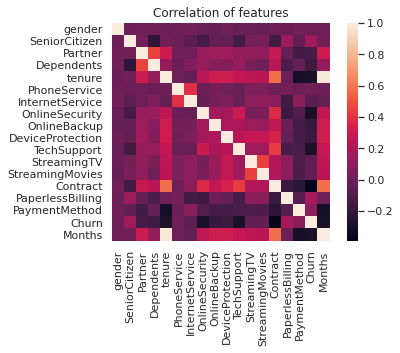

In [163]:
corrMatrix = train_data.corr()
sns.heatmap(corrMatrix, annot=False,square=True,vmax=1.0)
plt.title('Correlation of features')
plt.show()

In [164]:
X = train_data.drop('Churn',axis=1)
y = train_data.Churn

Logistic Regression Model

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logistic = LogisticRegression(random_state=30)
scores = cross_val_score(logistic, X, y, cv=10)
scores.mean()

0.7813387423935092

Support Vector Machine (SVM Classification) with cross validation.

In [193]:

from sklearn.svm import SVC
svc = SVC(random_state=30)
scores = cross_validate(rfc,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'accuracy'))
scores

{'fit_time': array([0.60765481, 0.60136557, 0.61141777, 0.61517882, 0.37039423]),
 'score_time': array([0.08508229, 0.09259772, 0.08444643, 0.08571362, 0.0556767 ]),
 'test_accuracy': array([0.77281947, 0.76470588, 0.77180527, 0.77281947, 0.76876268]),
 'test_roc_auc': array([0.78104995, 0.77917988, 0.80414397, 0.79207524, 0.78270862])}

Model Training and Accuracy Derivation for Random Forest Classifier.

In [194]:

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

(3697, 17)
(3697,)
(1233, 17)
(1233,)
Training Accuracy : 0.935352988909927
Testing Accuracy : 0.7688564476885644
